In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn as sklearn
import keras as kr
import tensorflow as tf
import scipy as sp
import joblib as jb


In [2]:
# import data set
df = sns.load_dataset('iris')
df

# To save the dataset
# df.to_csv('unsupervised_learning_dataset_iris.csv')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
X = df.iloc[:,:-1]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


- Remove the target feature we will deal with descriptive feature only.

In [4]:
# Remove the target feature we will deal with descriptive feature only.

X = df.iloc[:,:-1].values
X


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

- Finding the optimum number of clusters for K-means Classifictaions
- Elbow Method

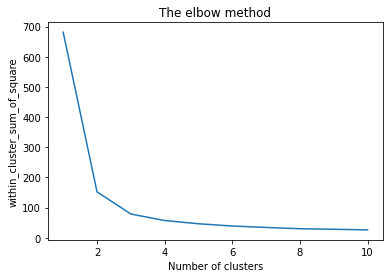

In [5]:
# Elbow Method

from sklearn.cluster import KMeans
within_cluster_sum_of_square = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300,n_init=10,random_state=0)
    kmeans.fit(X)
    within_cluster_sum_of_square.append(kmeans.inertia_)

# plotting the results onto a line graph
plt.plot(range(1,11),within_cluster_sum_of_square)
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("within_cluster_sum_of_square")
plt.show()


- Apply k-means Cluster

In [6]:
# Apply k-means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300,n_init=10,random_state=0)
predictions =   kmeans.fit_predict(X)

# Visualizing the basics of sepal features
- Plotting on the features of sepal features

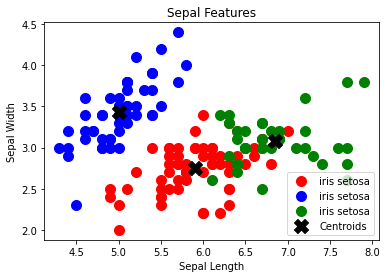

In [7]:
# Visualizing the cluster 
plt.scatter(X[predictions == 0,0], X[predictions == 0,1], s = 100, c = 'red',label='iris setosa')
plt.scatter(X[predictions == 1,0], X[predictions == 1,1], s = 100, c = 'blue',label='iris setosa')
plt.scatter(X[predictions == 2,0], X[predictions == 2,1], s = 100, c = 'green',label='iris setosa')

#Plotting the centralized of the cluster
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='X',s=200,c='black',label='Centroids')
plt.title("Sepal Features")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

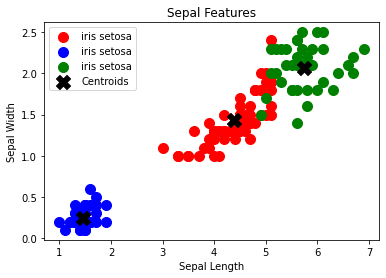

In [8]:
# Visualizing the cluster 
plt.scatter(X[predictions == 0,2], X[predictions == 0,3], s = 100, c = 'red',label='iris setosa')
plt.scatter(X[predictions == 1,2], X[predictions == 1,3], s = 100, c = 'blue',label='iris setosa')
plt.scatter(X[predictions == 2,2], X[predictions == 2,3], s = 100, c = 'green',label='iris setosa')

#Plotting the centralized of the cluster
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],marker='X',s=200,c='black',label='Centroids')
plt.title("Sepal Features")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

- Remove the X feature we will deal with y feature only.
- x = input and y = output

In [9]:
y =  df.iloc[:,-1:]
y

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [10]:
y = y.replace('setosa',1)
y = y.replace('virginica',2)
y = y.replace('versicolor',0)



# Measuring Accuracy

In [11]:
# checking accuracy score

from sklearn.metrics import accuracy_score
score = accuracy_score(y,predictions)
score

0.8933333333333333

- Confusion Matrix

In [12]:
# use to show error in prediction
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y,predictions)
cm

array([[48,  0,  2],
       [ 0, 50,  0],
       [14,  0, 36]], dtype=int64)

- Heatmap

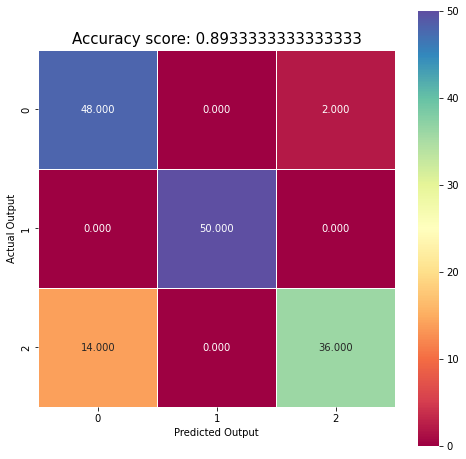

In [13]:
# heat map for graphical representation
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square =True, cmap = 'Spectral');
plt.ylabel('Actual Output');
plt.xlabel('Predicted Output');
all_sample_title = 'Accuracy score: {0}'.format(score)
plt.title(all_sample_title, size = 15);